<a href="https://colab.research.google.com/github/syuan0525/project-team/blob/main/MobileNetV2_scooters1115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import datasets, models, layers, utils, activations, losses, optimizers, metrics
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow 
import glob 
from tqdm import tqdm 
from sklearn.model_selection import train_test_split
import pandas as pd
import cv2
from PIL import Image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout

In [26]:
os.chdir("/content/drive/MyDrive/Tebame_第四組_機車辨識")

In [27]:
trans = ["s2", "gp", "krv", "fiddle", "sr", "vivo", "famous", "drg", "duke", "limi", "gryphus6", "force", "viva", "s3", "like", "many", "bws", "sl", "axiz", "jog"]
s2 = glob.glob("./嚴選資料集/GOGORO_S2_裁/*") 

gp = glob.glob("./嚴選資料集/KYMCO_GP_125_裁/*") 

krv = glob.glob("./嚴選資料集/KYMCO_KRV_裁/*")

fiddle = glob.glob("./嚴選資料集/SYM_FIDDLE_125_裁/*") 

sr = glob.glob("./嚴選資料集/SYM_JET_SR_125_裁/*")

vivo = glob.glob("./嚴選資料集/SYM_活力_125_裁/*")

famous = glob.glob("./嚴選資料集/KYMCO_新名流125_裁/*")

drg = glob.glob("./嚴選資料集/SYM_DRG_裁/*") 

duke = glob.glob("./嚴選資料集/SYM_新迪爵_125 _裁/*")

limi = glob.glob("./嚴選資料集/YAMAHA_LIMI_125_已裁減/*")

gryphus6 = glob.glob("./嚴選資料集/YAMAHA_六代勁戰_125_裁/*")



force = glob.glob("./嚴選資料集/YAMAHA_FORCE_裁/*")

viva = glob.glob("./嚴選資料集/GOGORO_VIVA_MIX_裁/*")

s3 = glob.glob("./嚴選資料集/GOGORO_S3_裁/*")

like = glob.glob("./嚴選資料集/KYMCO_LIKE_125_裁/*")

many = glob.glob("./嚴選資料集/KYMCO_MANY_125_裁/*")

bws = glob.glob("./嚴選資料集/YAMAHA_BWS_125_裁/*")

sl = glob.glob("./嚴選資料集/SYM_JET_SL_125_裁/*")

axiz = glob.glob("./嚴選資料集/YAMAHA_勁豪_125_裁/*")

jog = glob.glob("./嚴選資料集/YAMAHA_JOG_125_裁/*")

In [28]:
print(len(trans))

20


In [29]:
import pandas as pd
df = pd.DataFrame({
    "path": s2 + gp + krv + fiddle + sr + vivo + famous + drg + duke + limi + gryphus6 + force + viva + s3 + like + many + bws + sl + axiz + jog,
    "ans": [0] * len(s2) + [1] * len(gp) + [2] * len(krv) + [3] * len(fiddle) + [4] * len(sr) + [5] * len(vivo) + [6] * len(famous)
    + [7] * len(drg) + [8] * len(duke) + [9] * len(limi) + [10] * len(gryphus6) + [11] * len(force) + [12] * len(viva) + [13] * len(s3)
     + [14] * len(like) + [15] * len(many) + [16] * len(bws) + [17] * len(sl) + [18] * len(axiz) + [19] * len(jog)
})
df

,path,ans
0,./嚴選資料集/GOGORO_S2_裁/0.jpg,0
1,./嚴選資料集/GOGORO_S2_裁/1.jpg,0
2,./嚴選資料集/GOGORO_S2_裁/3.jpg,0
3,./嚴選資料集/GOGORO_S2_裁/5.jpg,0
4,./嚴選資料集/GOGORO_S2_裁/6.jpg,0
...,...,...
7071,./嚴選資料集/YAMAHA_JOG_125_裁/IMG_2671.JPG,19
7072,./嚴選資料集/YAMAHA_JOG_125_裁/IMG_2670.JPG,19
7073,./嚴選資料集/YAMAHA_JOG_125_裁/IMG_2668a.jpg,19
7074,./嚴選資料集/YAMAHA_JOG_125_裁/IMG_2669.JPG,19


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[327 575 301 790 212 477 170 274 545 315 790 181 182 315 276 354 134 142
 511 205]


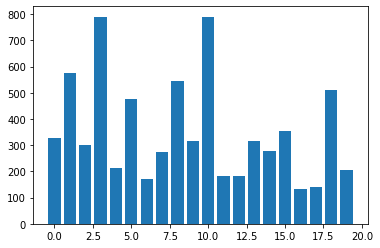

In [30]:
list_ = [i for n, i in enumerate(df["ans"])]
cls, count = np.unique(list_, return_counts=True)
plt.bar(cls, count)
print(cls, count, sep="\n")
# trans = ["s2", "gp", "krv", "fiddle", "sr", "vivo", "famous", "drg", "duke", "limi", "gryphus6", "force", "viva", "s3", "like", "many", "bws", "sl", "axiz", "jog"]


./嚴選資料集/SYM_新迪爵_125 _裁/119344.jpg
[[[-0.69411767 -0.64705884 -0.6627451 ]
  [-0.6862745  -0.64705884 -0.654902  ]
  [-0.6627451  -0.6313726  -0.6392157 ]
  ...
  [ 0.8039216   0.8039216   0.8039216 ]
  [-0.34117645 -0.30196077 -0.31764704]
  [-0.5686275  -0.4980392  -0.5372549 ]]

 [[-0.7176471  -0.67058825 -0.6862745 ]
  [-0.70980394 -0.6784314  -0.6862745 ]
  [-0.6627451  -0.6313726  -0.6392157 ]
  ...
  [ 0.00392163  0.03529418  0.01176476]
  [-0.52156866 -0.46666664 -0.4980392 ]
  [-0.4588235  -0.38039213 -0.4352941 ]]

 [[-0.7411765  -0.6784314  -0.7019608 ]
  [-0.7411765  -0.69411767 -0.70980394]
  [-0.6862745  -0.654902   -0.6627451 ]
  ...
  [-0.49019605 -0.45098037 -0.45098037]
  [-0.5764706  -0.5137255  -0.5529412 ]
  [-0.5294118  -0.44313723 -0.5137255 ]]

 ...

 [[ 0.01176476 -0.01176471 -0.05098039]
  [-0.01176471 -0.05098039 -0.08235294]
  [-0.09019607 -0.14509803 -0.16862744]
  ...
  [ 0.27058828  0.19215691  0.12941182]
  [ 0.09803927  0.03529418 -0.04313725]
  [ 0.0196

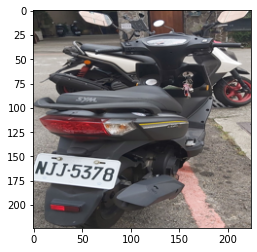

In [31]:
p = df["path"]

idx = np.random.randint(0, len(p), size=1)[0]  # 隨機取一張圖
# idx
path = p[idx]
# print(path.shape)

# img = cv2.imread(path)
# plt.imshow(img[:, :, ::-1])

img = Image.open(path).resize((224, 224)).convert("RGB")
img_np = np.array(img)
print(path)
img_np_pre = preprocess_input(img_np)
print(img_np_pre)
plt.imshow(img)
# print(img)

In [32]:
# clear graph
tensorflow.keras.backend.clear_session() 

In [33]:
base_model = MobileNetV2(
    include_top=False, weights='imagenet', input_shape=(224, 224, 3)
)
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.25)(x)
predictions = layers.Dense(20, activation='softmax')(x)

# Freeze layers 凍結層 把遷移來的卷積的參數固定
for l in base_model.layers:
  l.trainable = False

# 把卷積和後面的分類層合在一起
model = models.Model(base_model.input, predictions)
model.summary()
# base_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [34]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(
        loss=SparseCategoricalCrossentropy(),
        optimizer="adam",
        metrics=["acc"]
)

In [35]:
x = np.array(df["path"])
y = np.array(df["ans"])

In [36]:
def data_generator(x, y, batch_size=20):
  while True:
    idx = np.random.randint(0, len(x), size=batch_size)
    x_batch, y_batch = x[idx], y[idx]
    x_final = []
    for path in x_batch:
      img = Image.open(path).resize((224, 224)).convert("RGB")    #  開啟路徑圖檔並改大小、轉成RGB
      img_pre = preprocess_input(np.array(img))              # 轉成陣列再預處理
      x_final.append(img_pre)            
    x_final = np.array(x_final)
    y_batch = np.array(y_batch)
    yield (x_final, y_batch)
gen = data_generator(x, y)
x_gen, y_gen = gen.__next__()
# print(x_gen.shape)
# print(y_gen.shape)
print(x_gen)
# print(y_gen)


[[[[-0.31764704 -0.30196077 -0.27058822]
   [-0.20784312 -0.19999999 -0.17647058]
   [-0.02745098 -0.02745098 -0.05882353]
   ...
   [-0.99215686 -0.10588235  0.64705884]
   [-0.99215686 -0.10588235  0.64705884]
   [-0.99215686 -0.10588235  0.64705884]]

  [[-0.24705881 -0.19215685 -0.14509803]
   [-0.19215685 -0.14509803 -0.10588235]
   [-0.00392157  0.01176476  0.00392163]
   ...
   [-0.99215686 -0.10588235  0.64705884]
   [-0.99215686 -0.10588235  0.64705884]
   [-0.99215686 -0.10588235  0.64705884]]

  [[-0.38039213 -0.14509803  0.04313731]
   [-0.38823527 -0.1607843   0.01176476]
   [-0.41176468 -0.2862745  -0.12941176]
   ...
   [-0.99215686 -0.10588235  0.64705884]
   [-0.99215686 -0.10588235  0.64705884]
   [-0.99215686 -0.10588235  0.64705884]]

  ...

  [[ 0.5372549   0.49803925  0.45882356]
   [ 0.5921569   0.5529412   0.5137255 ]
   [ 0.52156866  0.4901961   0.4431373 ]
   ...
   [ 0.49803925  0.45882356  0.38823533]
   [ 0.4039216   0.35686278  0.2941177 ]
   [ 0.5137255  

In [37]:
from sklearn.model_selection import train_test_split
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6368,)
(708,)
(6368,)
(708,)


In [38]:
train_generator = data_generator(x_train, y_train)
test_generator = data_generator(x_test, y_test)

In [39]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
             EarlyStopping(patience=10, restore_best_weights=True),
             ModelCheckpoint("/content/1115.h5", save_best_only=True)
]

model.fit(
    train_generator,
    steps_per_epoch=30,
    epochs=300,
    validation_data=test_generator,
    validation_steps=3, 
    callbacks=callbacks
                    )

Epoch 1/300
30/30 [==============================] - ETA: 0s - loss: 3.0543 - acc: 0.1417

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


30/30 [==============================] - 177s 6s/step - loss: 3.0543 - acc: 0.1417 - val_loss: 2.5078 - val_acc: 0.3167
Epoch 2/300
30/30 [==============================] - 159s 5s/step - loss: 2.6034 - acc: 0.2367 - val_loss: 2.5028 - val_acc: 0.2667
Epoch 3/300
30/30 [==============================] - 156s 5s/step - loss: 2.3043 - acc: 0.3000 - val_loss: 2.1912 - val_acc: 0.3667
Epoch 4/300
30/30 [==============================] - 159s 5s/step - loss: 2.0631 - acc: 0.3917 - val_loss: 2.0401 - val_acc: 0.3500
Epoch 5/300
30/30 [==============================] - 143s 5s/step - loss: 1.9684 - acc: 0.4333 - val_loss: 1.7765 - val_acc: 0.4833
Epoch 6/300
30/30 [==============================] - 134s 5s/step - loss: 1.8796 - acc: 0.4583 - val_loss: 1.5653 - val_acc: 0.5833
Epoch 7/300
30/30 [==============================] - 124s 4s/step - loss: 1.7143 - acc: 0.5000 - val_loss: 1.6158 - val_acc: 0.5500
Epoch 8/300
30/30 [==============================] - 120s 4s/step - loss: 1.5349 - acc: 

# Grad-CAM

In [40]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import load_model

In [41]:
# clear graph
tensorflow.keras.backend.clear_session() 

In [42]:
model = load_model("/content/1115.h5")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

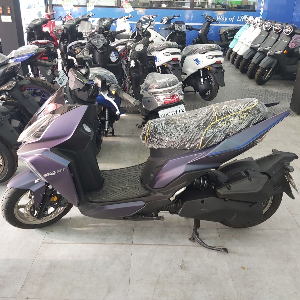

In [43]:
p = df["path"]
idx = np.random.randint(0, len(p), size=1)[0]  # 隨機取一張圖
path = p[idx]

img = image.load_img(path, target_size=(224,224))
cv2_imshow(cv2.resize(cv2.imread(path), (300,300)))

In [44]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# print(decode_predictions(preds))

In [45]:
with tf.GradientTape() as tape:
  last_conv_layer = model.get_layer("Conv_1_bn")
  iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
  model_out, last_conv_layer = iterate(x)
  class_out = model_out[:, np.argmax(model_out[0])]
  grads = tape.gradient(class_out, last_conv_layer)
  pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1) 


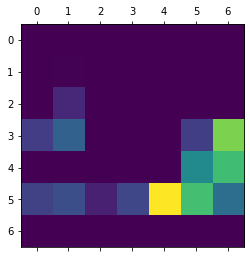

In [46]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((7, 7))
plt.matshow(heatmap)
plt.show()

In [47]:
img = cv2.imread(path)

In [48]:
INTENSITY = 0.5

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

img = heatmap * INTENSITY +img

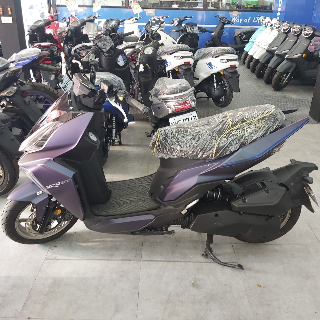

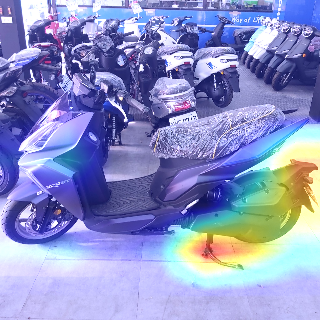

In [49]:
cv2_imshow(cv2.resize(cv2.imread(path), (320,320)))
cv2_imshow(cv2.resize(img, (320,320)))

In [50]:
ori_imgs = []
for p in x_test:
    img = Image.open(p).resize((224, 224)).convert("RGB")
    ori_imgs.append(np.array(img))
ori_imgs = np.array(ori_imgs)
preprocess_imgs = preprocess_input(ori_imgs)

pre = model.predict(preprocess_imgs)

pre = pre.argmax(axis=1)

In [51]:
import pandas as pd
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pre)
pd.DataFrame(
        mat,
        index=["{}(正確)".format(trans[i]) for i in range(20)],
        columns=["{}(預測)".format(trans[i]) for i in range(20)])

,s2(預測),gp(預測),krv(預測),fiddle(預測),sr(預測),vivo(預測),famous(預測),drg(預測),duke(預測),limi(預測),gryphus6(預測),force(預測),viva(預測),s3(預測),like(預測),many(預測),bws(預測),sl(預測),axiz(預測),jog(預測)
s2(正確),31,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
gp(正確),0,57,0,0,0,1,0,1,3,0,0,0,0,0,1,0,0,0,0,1
krv(正確),0,1,34,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0
fiddle(正確),0,0,1,72,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
sr(正確),0,2,1,0,7,0,0,2,4,0,0,0,0,0,0,0,0,0,0,1
vivo(正確),0,5,0,0,0,41,0,0,3,0,0,1,0,0,0,0,0,0,0,1
famous(正確),0,13,0,0,0,0,6,0,1,0,0,0,0,0,0,0,0,0,1,0
drg(正確),0,0,1,0,0,0,0,24,0,0,4,0,0,0,0,0,0,0,0,0
duke(正確),0,5,0,1,0,6,1,0,27,0,1,0,0,0,0,0,0,0,1,0
limi(正確),0,1,0,0,1,0,0,0,0,27,0,1,0,1,0,0,0,0,0,0


Enter:https://cdn2.ettoday.net/images/5595/e5595112.jpg


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


預測: sr
機率: [4.9809816e-05 6.1027217e-03 1.4915729e-04 4.8108408e-03 9.1992939e-01
 5.1097661e-02 4.6312879e-03 2.5852936e-04 3.4198088e-03 4.5741850e-05
 3.1894643e-03 7.9166995e-05 2.9011915e-05 4.0879622e-05 1.7964132e-03
 2.6905193e-04 4.6244816e-07 3.8141665e-05 3.4947777e-03 5.6775118e-04]


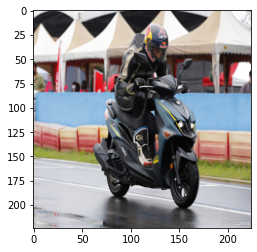

In [53]:

import requests
from tensorflow.keras.models import load_model
url = input("Enter:")
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((224, 224)).convert("RGB")
img_np = preprocess_input(np.array(img).reshape(1, 224, 224, 3))
# model = load_model('/content/1105.h5').
proba = model.predict(img_np)
ans = proba.argmax(axis=1)
print("預測:", trans[ans[0]])
print("機率:", proba[0])
plt.imshow(img)